<a href="https://colab.research.google.com/github/Nikunjbansal99/Cloud-AI/blob/main/ComputerVision_azure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision
!pip install pillow

     |████████████████████████████████| 85 kB 724 kB/s 
     |████████████████████████████████| 41 kB 574 kB/s 


In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

In [ ]:
subscription_key = "<subscription_key>"
endpoint = "<endpoint>"

In [ ]:
#authenticate our notebook for azure computer vision
cvcredentials = CognitiveServicesCredentials(subscription_key)
computervision_client = ComputerVisionClient(endpoint, cvcredentials)

In [ ]:
'''
baseurl = 'https://tomato5615603831.blob.core.windows.net/images/'
imgname = ['00001.jpeg','00002.jpeg','00003.jpeg','cv0001.jpeg', 'cv0002.jpeg', 'cv0003.jpeg','cv0004.jpeg']
imgurl = {}
for i,img in enumerate(imgname):
  fname =  baseurl + img
  imgurl[imgname[i]] = fname
imgurl
'''
imgurl = {'pokemon_PNG93.png': 'https://cvgrenald.blob.core.windows.net/image/pokemon_PNG93.png'}

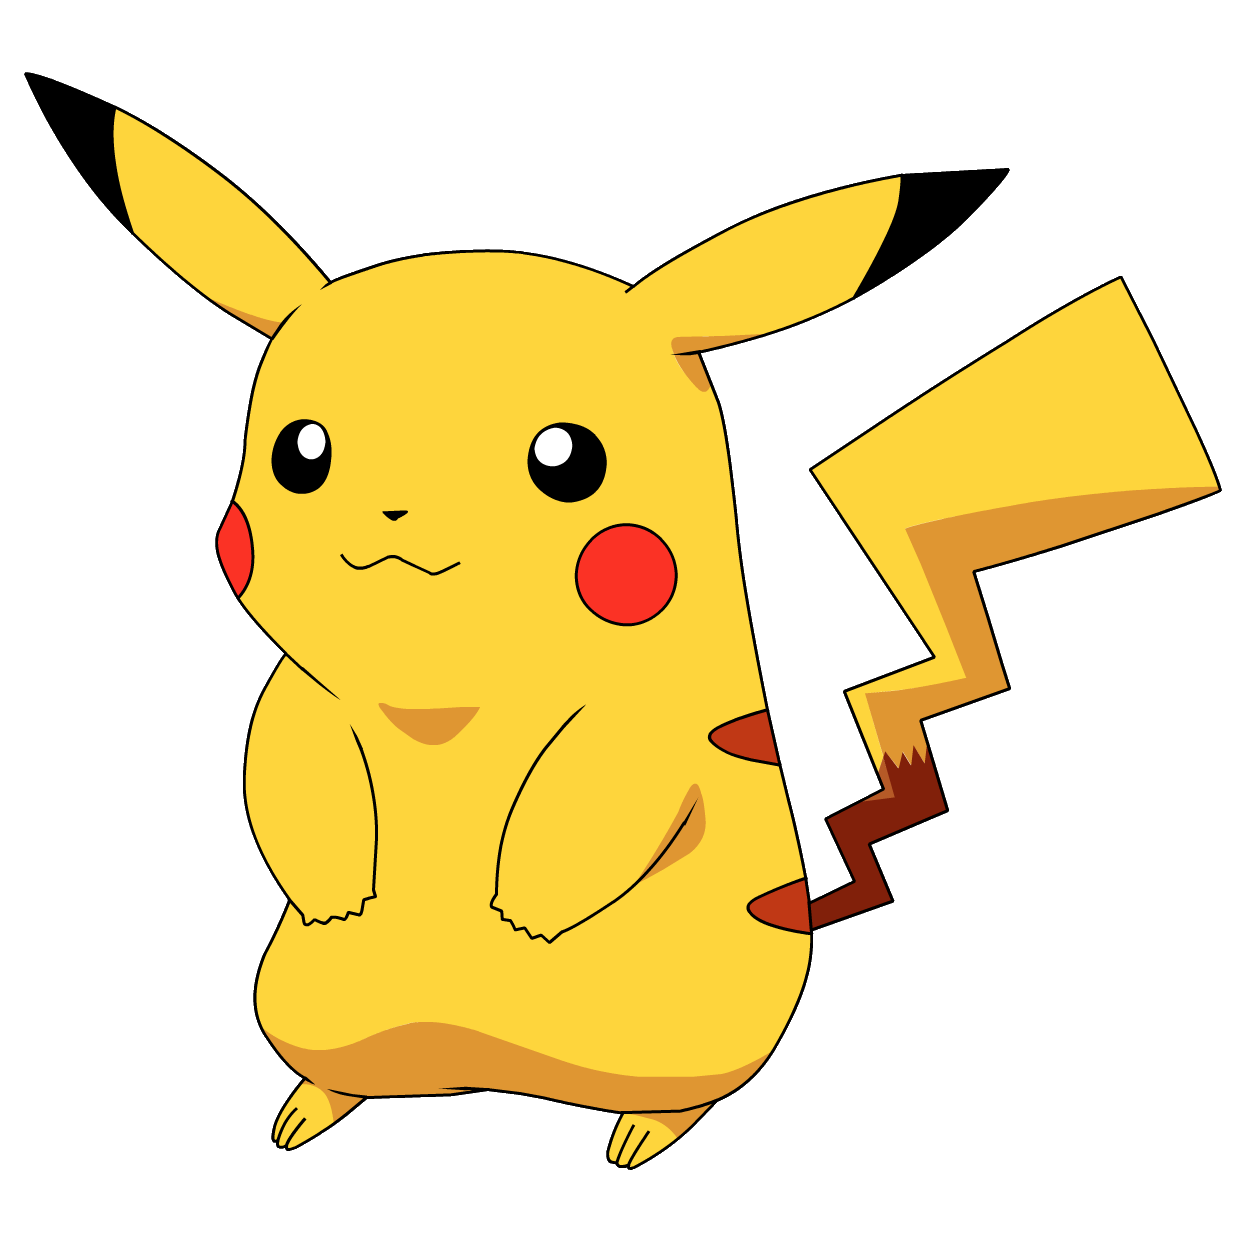

In [ ]:
import requests
import IPython.display as Disp
url = 'https://cvgrenald.blob.core.windows.net/image/pokemon_PNG93.png'
Disp.Image(requests.get(url).content)

In [ ]:
for imname, imgur in imgurl.items():
    print(imname, imgur)
    description_results = computervision_client.describe_image(imgur)
    print('Image = ' + imname)
    print()
    # Get the captions (descriptions) from the response, with confidence level
    print("Description of remote image: ")
    if (len(description_results.captions) == 0):
        print("No description detected.")
        print('****')
    else:
        for caption in description_results.captions:
            print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))
        print('****')

pokemon_PNG93.png https://cvgrenald.blob.core.windows.net/image/pokemon_PNG93.png
Image = pokemon_PNG93.png

Description of remote image: 
'a cartoon of a yellow cat' with confidence 31.25%
****


In [ ]:
for imname, imgur in imgurl.items():

  remote_image_features = ["categories"]
  # Call API with URL and features
  categorize_results_remote = computervision_client.analyze_image(imgur , remote_image_features)
  print(imname)
  # Print results with confidence score
  print("Categories from remote image: ")
  if (len(categorize_results_remote.categories) == 0):
      print("No categories detected.")
      print('*****')
  else:
      for category in categorize_results_remote.categories:
          print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))
      print('*****')

pokemon_PNG93.png
Categories from remote image: 
'sky_object' with confidence 99.61%
*****


In [ ]:
for imname, imgur in imgurl.items():

  # Call API with remote image
  tags_result_remote = computervision_client.tag_image(imgur)
  print(imname)
  # Print results with confidence score
  print("Tags in the remote image: ")
  if (len(tags_result_remote.tags) == 0):
      print("No tags detected.")
      print('****')
  else:
      for tag in tags_result_remote.tags:
          print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))
      print('****')

pokemon_PNG93.png
Tags in the remote image: 
'clipart' with confidence 92.58%
'drawing' with confidence 89.29%
'illustration' with confidence 87.18%
'rabbit' with confidence 86.42%
'animated cartoon' with confidence 85.94%
'child art' with confidence 84.82%
'animal' with confidence 84.48%
'cartoon' with confidence 82.66%
****


In [ ]:
for imname, imgur in imgurl.items():
  detect_objects_results_remote = computervision_client.detect_objects(imgur)
  print('*****')
  print(imname)
  # Print detected objects results with bounding boxes
  print("Detecting objects in remote image:")
  if len(detect_objects_results_remote.objects) == 0:
      print("No objects detected.")
  else:
      for object in detect_objects_results_remote.objects:
          print("object at location {}, {}, {}, {}".format( \
          object.rectangle.x, object.rectangle.x + object.rectangle.w, \
          object.rectangle.y, object.rectangle.y + object.rectangle.h))

*****
pokemon_PNG93.png
Detecting objects in remote image:
No objects detected.


In [ ]:

for imgname, imgur in imgurl.items():
    
  remote_image_url_faces = imgur
  # Select the visual feature(s) you want.
  remote_image_features = ["faces"]
  # Call the API with remote URL and features
  detect_faces_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)
  print('****')
  print(imgname)
  # Print the results with gender, age, and bounding box
  print("Faces in the remote image: ")
  if (len(detect_faces_results_remote.faces) == 0):
      print("No faces detected.")
  else:
      for face in detect_faces_results_remote.faces:
          print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
          face.face_rectangle.left, face.face_rectangle.top, \
          face.face_rectangle.left + face.face_rectangle.width, \
          face.face_rectangle.top + face.face_rectangle.height))

****
pokemon_PNG93.png
Faces in the remote image: 
No faces detected.
